In [5]:
## import required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
# Load data from CSV
def load_data(csv_file, encoding='utf-8'):
    df = pd.read_csv(csv_file, encoding=encoding)
    return df


In [7]:
# Load data from CSV
df = pd.read_csv('twitter.csv',encoding='latin1')
print(df)

          textID                                              tweet sentiment  \
0     f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1     96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2     eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3     01082688c6                                        happy bday!  positive   
4     33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   
...          ...                                                ...       ...   
3529  e5f0e6ef4b  its at 3 am, im very tired but i can`t sleep  ...  negative   
3530  416863ce47  All alone in this old house again.  Thanks for...  positive   
3531  6332da480c   I know what you mean. My little dog is sinkin...  negative   
3532  df1baec676  _sutra what is your next youtube video gonna b...  positive   
3533  469e15c5a8   http://twitpic.com/4woj2 - omgssh  ang cute n...  positive   

     Time of Tweet Age of U

In [8]:
df.head()

,textID,tweet,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Kmï¿½),Density (P/Kmï¿½)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26


In [9]:
df.tail()

,textID,tweet,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Kmï¿½),Density (P/Kmï¿½)
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554,120340.0,55
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644,1266700.0,19
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589,910770.0,226
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816,120410.0,214
3533,469e15c5a8,http://twitpic.com/4woj2 - omgssh ang cute n...,positive,night,70-100,North Macedonia,2083374,25220.0,83


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   textID             3534 non-null   object 
 1   tweet              3534 non-null   object 
 2   sentiment          3534 non-null   object 
 3   Time of Tweet      3534 non-null   object 
 4   Age of User        3534 non-null   object 
 5   Country            3534 non-null   object 
 6   Population -2020   3534 non-null   int64  
 7   Land Area (Kmï¿½)  3534 non-null   float64
 8   Density (P/Kmï¿½)  3534 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 248.6+ KB


In [11]:
df.isnull().sum()

textID               0
tweet                0
sentiment            0
Time of Tweet        0
Age of User          0
Country              0
Population -2020     0
Land Area (Kmï¿½)    0
Density (P/Kmï¿½)    0
dtype: int64

In [12]:
df.describe()

,Population -2020,Land Area (Kmï¿½),Density (P/Kmï¿½)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [21]:
# Preprocess data
def preprocess_data(df):
    # Drop rows with missing values
    df.dropna(inplace=True)
    # Assuming CSV has 'tweets' column for tweets and 'sentiment' column for sentiment labels
    X = df['tweet']
    y = df['sentiment']
    return X, y

In [22]:
# Train Random Forest classifier
def train_rf_classifier(X_train, y_train):
    vectorizer = TfidfVectorizer(max_features=10000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train_vectorized, y_train)
    return vectorizer, rf_classifier

In [28]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Evaluate classifier for multi-class
def evaluate_classifier(X_test, y_test, vectorizer, classifier):
    X_test_vectorized = vectorizer.transform(X_test)
    y_pred = classifier.predict(X_test_vectorized)
    
    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # ROC curve for multi-class
    n_classes = len(set(y_test))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    if n_classes > 2:
        y_test_binary = label_binarize(y_test, classes=['negative', 'neutral', 'positive'])
        y_pred_proba = classifier.predict_proba(X_test_vectorized)
        
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
    else:
        y_score = classifier.predict_proba(X_test_vectorized)[:,1]
        fpr[0], tpr[0], _ = roc_curve(y_test, y_score)
        roc_auc[0] = auc(fpr[0], tpr[0])
    
    return report, cm, fpr, tpr, roc_auc

# Plot ROC curve for multi-class
def plot_roc_curve(fpr, tpr, roc_auc, n_classes):
    plt.figure()
    colors = ['blue', 'red', 'green']
    
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
    plt.legend(loc="lower right")
    plt.show()

Unique classes in y: ['neutral' 'positive' 'negative']
Classification Report:
              precision    recall  f1-score   support

    negative       0.65      0.48      0.56       207
     neutral       0.57      0.75      0.65       286
    positive       0.76      0.63      0.69       214

    accuracy                           0.63       707
   macro avg       0.66      0.62      0.63       707
weighted avg       0.65      0.63      0.63       707

Confusion Matrix:
[[100  95  12]
 [ 41 214  31]
 [ 12  68 134]]
ROC AUC: {0: 0.7997681159420289, 1: 0.7202672624287826, 2: 0.8358704100396201}


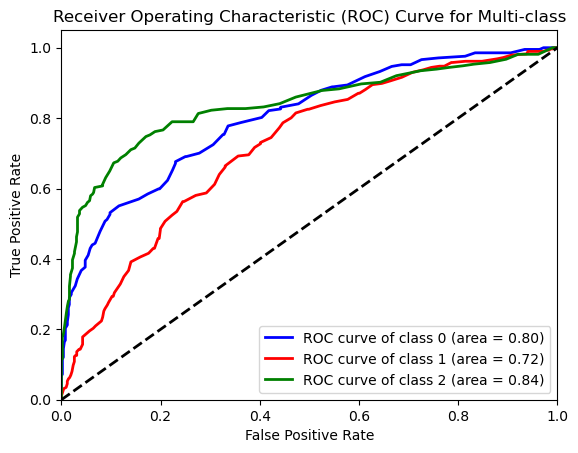


Analysis Results:
              precision    recall  f1-score     support    Accuracy
negative       0.653595  0.483092  0.555556  207.000000  135.294118
neutral        0.567639  0.748252  0.645551  286.000000  162.344828
positive       0.757062  0.626168  0.685422  214.000000  162.011299
accuracy       0.633663  0.633663  0.633663    0.633663    0.401529
macro avg      0.659432  0.619171  0.628843  707.000000  466.218465
weighted avg   0.650142  0.633663  0.631270  707.000000  459.650245
Enter a tweet: i hate her!!!
Predicted sentiment: ['negative']


In [29]:
# Main function
def main():
    # Load data
    df = load_data('twitter.csv', encoding='latin1')
    # Preprocess data
    X, y = preprocess_data(df)
    # Check unique classes in y
    unique_classes = y.unique()
    print("Unique classes in y:", unique_classes)
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Train Random Forest classifier
    vectorizer, rf_classifier = train_rf_classifier(X_train, y_train)
    # Evaluate classifier
    report, cm, fpr, tpr, roc_auc = evaluate_classifier(X_test, y_test, vectorizer, rf_classifier)
    # Print evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, rf_classifier.predict(vectorizer.transform(X_test))))
    print("Confusion Matrix:")
    print(cm)
    
    # Check conditions to plot ROC curve
    if fpr is not None and tpr is not None and roc_auc is not None:
        print("ROC AUC:", roc_auc)
        # Plot ROC curve
        n_classes = len(set(y_test))
        plot_roc_curve(fpr, tpr, roc_auc, n_classes)
    else:
        print("Cannot plot ROC curve. Conditions not met.")
    
    # Create a DataFrame for analysis results
    df_results = pd.DataFrame(report).transpose()
    df_results['Accuracy'] = df_results.apply(lambda row: row['support'] * row['precision'], axis=1)
    print("\nAnalysis Results:")
    print(df_results)
    
    # Ask user to enter a tweet
    tweet = input("Enter a tweet: ")
    # Predict the sentiment of the entered tweet
    tweet_vectorized = vectorizer.transform([tweet])
    sentiment = rf_classifier.predict(tweet_vectorized)
    print(f"Predicted sentiment: {sentiment}")

if __name__ == "__main__":
    main()
